<a href="https://colab.research.google.com/github/shriju/lstm-stock-price-prediction/blob/main/lstm_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



Apple stock

Beginning date = 2010-01-01

End Date = 2023-08-17

In [ ]:
df=pd.read_csv('/content/AAPL.csv')
df


Date        Open        High         Low       Close   Adj Close  \
0     2010-01-04    7.622500    7.660714    7.585000    7.643214    6.487535   
1     2010-01-05    7.664286    7.699643    7.616071    7.656429    6.498750   
2     2010-01-06    7.656429    7.686786    7.526786    7.534643    6.395379   
3     2010-01-07    7.562500    7.571429    7.466071    7.520714    6.383556   
4     2010-01-08    7.510714    7.571429    7.466429    7.570714    6.425995   
...          ...         ...         ...         ...         ...         ...   
3428  2023-08-17  177.139999  177.509995  173.479996  174.000000  174.000000   
3429  2023-08-18  172.300003  175.100006  171.960007  174.490005  174.490005   
3430  2023-08-21  175.070007  176.130005  173.740005  175.839996  175.839996   
3431  2023-08-22  177.059998  177.679993  176.250000  177.229996  177.229996   
3432  2023-08-23  178.520004  181.550003  178.330002  181.119995  181.119995   

         Volume  
0     493729600  
1     601904800  
2     552160000  
3     477131200  
4     447610800  
...         ...  
3428   66062900  
3429   61114200  
3430   46311900  
3431   42084200  
3432   52722800  

[3433 rows x 7 columns]

In [ ]:
df.tail()

Date        Open        High         Low       Close   Adj Close  \
3428  2023-08-17  177.139999  177.509995  173.479996  174.000000  174.000000   
3429  2023-08-18  172.300003  175.100006  171.960007  174.490005  174.490005   
3430  2023-08-21  175.070007  176.130005  173.740005  175.839996  175.839996   
3431  2023-08-22  177.059998  177.679993  176.250000  177.229996  177.229996   
3432  2023-08-23  178.520004  181.550003  178.330002  181.119995  181.119995   

        Volume  
3428  66062900  
3429  61114200  
3430  46311900  
3431  42084200  
3432  52722800

In [ ]:
df=df.drop(['Date', 'Adj Close'], axis = 1)
df

Open        High         Low       Close     Volume
0       7.622500    7.660714    7.585000    7.643214  493729600
1       7.664286    7.699643    7.616071    7.656429  601904800
2       7.656429    7.686786    7.526786    7.534643  552160000
3       7.562500    7.571429    7.466071    7.520714  477131200
4       7.510714    7.571429    7.466429    7.570714  447610800
...          ...         ...         ...         ...        ...
3428  177.139999  177.509995  173.479996  174.000000   66062900
3429  172.300003  175.100006  171.960007  174.490005   61114200
3430  175.070007  176.130005  173.740005  175.839996   46311900
3431  177.059998  177.679993  176.250000  177.229996   42084200
3432  178.520004  181.550003  178.330002  181.119995   52722800

[3433 rows x 5 columns]

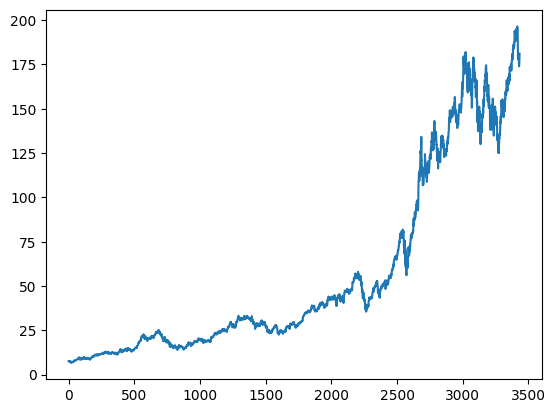

In [ ]:
plt.plot(df['Close'])

In [ ]:
df2=df.reset_index()['Close']


In [ ]:
ma100 = df['Close'].rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3428    178.171400
3429    178.333501
3430    178.515401
3431    178.680000
3432    178.867600
Name: Close, Length: 3433, dtype: float64

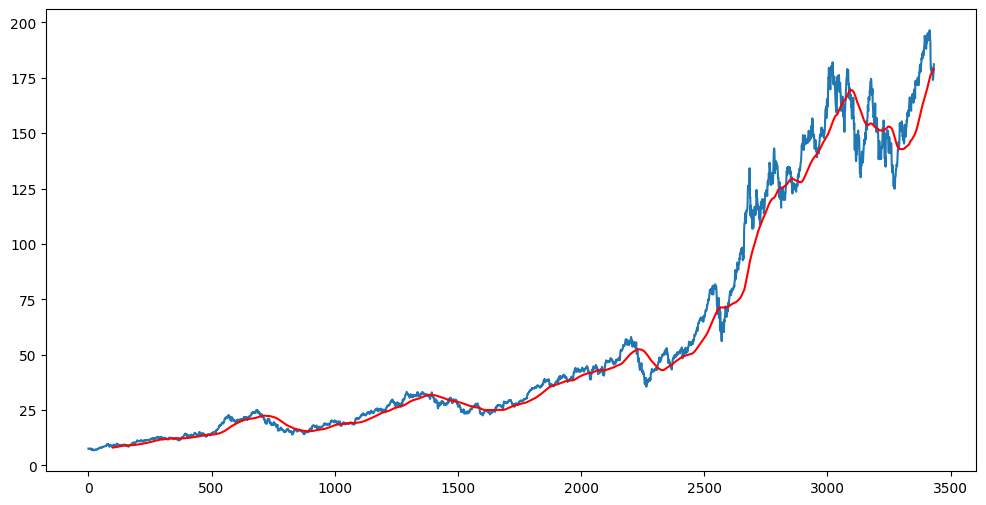

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma100, 'r')

In [ ]:
ma200 = df['Close'].rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3428    161.36405
3429    161.46980
3430    161.59575
3431    161.75675
3432    161.96795
Name: Close, Length: 3433, dtype: float64

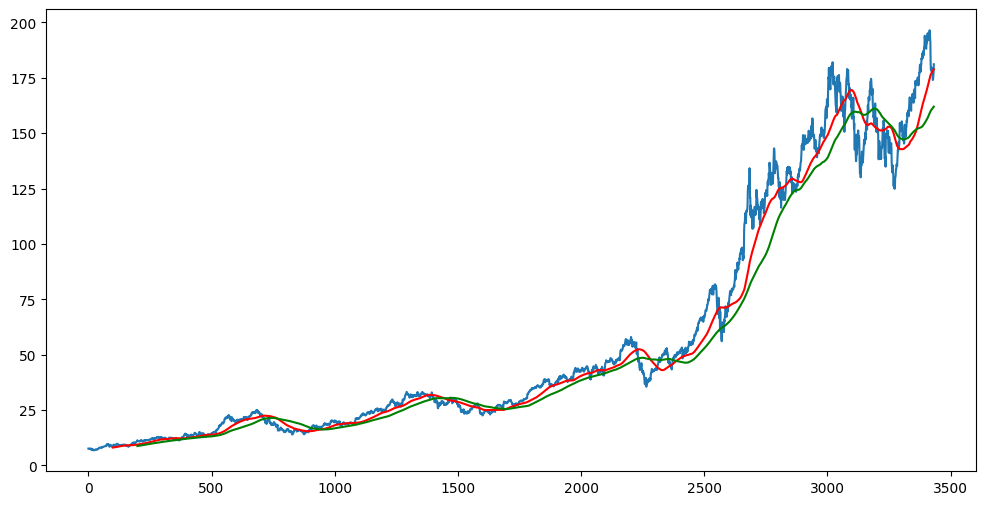

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [ ]:
df.shape

(3433, 5)

In [ ]:
# splitting data into training and testing
train_data=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
test_data=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(train_data.shape)
print(test_data.shape)

(2403, 1)
(1030, 1)


In [ ]:
train_data.head()

Close
0  7.643214
1  7.656429
2  7.534643
3  7.520714
4  7.570714

In [ ]:
test_data.head()

Close
2403  52.209999
2404  52.167500
2405  51.755001
2406  51.935001
2407  52.419998

In [ ]:
# Applying Min Max Scaling as LSTM is sensitive to the scale of the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
training_array = scaler.fit_transform(train_data)
training_array

array([[0.01533047],
       [0.01558879],
       [0.01320823],
       ...,
       [0.87094048],
       [0.85593807],
       [0.87856381]])

In [ ]:
training_array.shape

(2403, 1)

In [ ]:
X_train = []
y_train = []

for i in range(100, training_array.shape[0]):
  X_train.append(training_array[i-100:i])
  y_train.append(training_array[i,0])

X_train

[array([[1.53304706e-02],
        [1.55887851e-02],
        [1.32082261e-02],
        [1.29359550e-02],
        [1.39133083e-02],
        [1.26078575e-02],
        [1.09393591e-02],
        [1.29848227e-02],
        [1.21331375e-02],
        [9.68975425e-03],
        [1.60495290e-02],
        [1.37387921e-02],
        [1.11836974e-02],
        [3.97921576e-03],
        [7.69315829e-03],
        [9.69673255e-03],
        [1.10510706e-02],
        [5.05430439e-03],
        [6.97830254e-06],
        [1.87092787e-03],
        [2.65978881e-03],
        [5.01241503e-03],
        [0.00000000e+00],
        [2.38053943e-03],
        [1.44507549e-03],
        [2.89017053e-03],
        [2.14317940e-03],
        [4.62147371e-03],
        [5.81525212e-03],
        [7.92354001e-03],
        [7.33014973e-03],
        [7.59542296e-03],
        [6.71580499e-03],
        [5.84316533e-03],
        [3.49751742e-03],
        [6.01072278e-03],
        [6.94618671e-03],
        [8.77522522e-03],
        [1.1

In [ ]:
y_train

[0.04279409826384328,
 0.04525843596145657,
 0.048015960101154526,
 0.05019407011215893,
 0.049614636436399434,
 0.04461617801575507,
 0.04111166275103098,
 0.0399877064592869,
 0.03570828685936961,
 0.04081147845933858,
 0.04290580974570968,
 0.043443354059152506,
 0.04722012085833591,
 0.05249782866304736,
 0.05572309454370433,
 0.05725892706194133,
 0.05453631398201825,
 0.057105345764824234,
 0.05509479320308641,
 0.053719520284508354,
 0.05211386564672163,
 0.05323084363592395,
 0.044762781010330405,
 0.041523538977523866,
 0.03939431617844383,
 0.03831922755155817,
 0.039499029810702496,
 0.046508040793084654,
 0.046103142869133584,
 0.04717125319347748,
 0.04554466364806539,
 0.04171203133441587,
 0.04236126758265912,
 0.04146769301012365,
 0.04038562608069621,
 0.03736978746455655,
 0.04177485560435787,
 0.043415421301919443,
 0.04675237911737687,
 0.047394637063078365,
 0.046933893171727054,
 0.05028482713933402,
 0.04810671712832962,
 0.04611709947421716,
 0.04551673089083233

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)


In [ ]:
X_train

array([[[0.01533047],
        [0.01558879],
        [0.01320823],
        ...,
        [0.03819356],
        [0.03711847],
        [0.03634357]],

       [[0.01558879],
        [0.01320823],
        [0.01293596],
        ...,
        [0.03711847],
        [0.03634357],
        [0.0427941 ]],

       [[0.01320823],
        [0.01293596],
        [0.01391331],
        ...,
        [0.03634357],
        [0.0427941 ],
        [0.04525844]],

       ...,

       [[0.71734937],
        [0.71783806],
        [0.7204769 ],
        ...,
        [0.86874145],
        [0.86527181],
        [0.85965207]],

       [[0.71783806],
        [0.7204769 ],
        [0.71207164],
        ...,
        [0.86527181],
        [0.85965207],
        [0.87094048]],

       [[0.7204769 ],
        [0.71207164],
        [0.72096559],
        ...,
        [0.85965207],
        [0.87094048],
        [0.85593807]]])

In [ ]:
y_train

array([0.0427941 , 0.04525844, 0.04801596, ..., 0.87094048, 0.85593807,
       0.87856381])

In [ ]:
X_train.shape

(2303, 100, 1)

In [ ]:
#ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences=True,
               input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs =50)

Epoch 1/50
72/72 [==============================] - 62s 708ms/step - loss: 0.0411
Epoch 2/50
72/72 [==============================] - 54s 754ms/step - loss: 0.0070
Epoch 3/50
72/72 [==============================] - 51s 713ms/step - loss: 0.0062
Epoch 4/50
72/72 [==============================] - 51s 710ms/step - loss: 0.0063
Epoch 5/50
72/72 [==============================] - 60s 825ms/step - loss: 0.0058
Epoch 6/50
72/72 [==============================] - 51s 707ms/step - loss: 0.0053
Epoch 7/50
72/72 [==============================] - 52s 719ms/step - loss: 0.0053
Epoch 8/50
72/72 [==============================] - 52s 716ms/step - loss: 0.0052
Epoch 9/50
72/72 [==============================] - 51s 704ms/step - loss: 0.0046
Epoch 10/50
72/72 [==============================] - 51s 706ms/step - loss: 0.0042
Epoch 11/50
72/72 [==============================] - 52s 720ms/step - loss: 0.0043
Epoch 12/50
72/72 [==============================] - 51s 704ms/step - loss: 0.0040
Epoch 13/50
7

In [ ]:
model.save("keras_model.h5")

In [ ]:
test_data.head()

Close
2403  52.209999
2404  52.167500
2405  51.755001
2406  51.935001
2407  52.419998

In [ ]:
past_100_days = train_data.tail(100)

In [ ]:
final_df = past_100_days.append(test_data, ignore_index= True)

<ipython-input-68-5d14d5af1432>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test_data, ignore_index= True)


In [ ]:
final_df.head()

Close
0  43.287498
1  43.742500
2  43.962502
3  43.882500
4  43.630001

In [ ]:
# Applying Min Max Scaling as LSTM is sensitive to the scale of the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00105983],
       [0.00402739],
       [0.00546227],
       ...,
       [0.86557964],
       [0.87464535],
       [0.90001629]])

In [ ]:
input_data.shape

(1130, 1)

In [ ]:
input_data.shape[0]

1130

In [ ]:
X_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  X_test.append(input_data[i-100 :i])
  y_test.append(input_data[i, 0])


In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(1030, 100, 1)
(1030,)


In [ ]:
# Making Predictions
y_predicted = model.predict(X_test)

33/33 [==============================] - 3s 61ms/step


In [ ]:
y_predicted.shape

(1030, 1)

In [ ]:
# scaling the values up
# finding the factor by which we need to scale the value up
scaler.scale_

array([0.00652209])

In [ ]:
scale_factor = 1/0.00652209
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

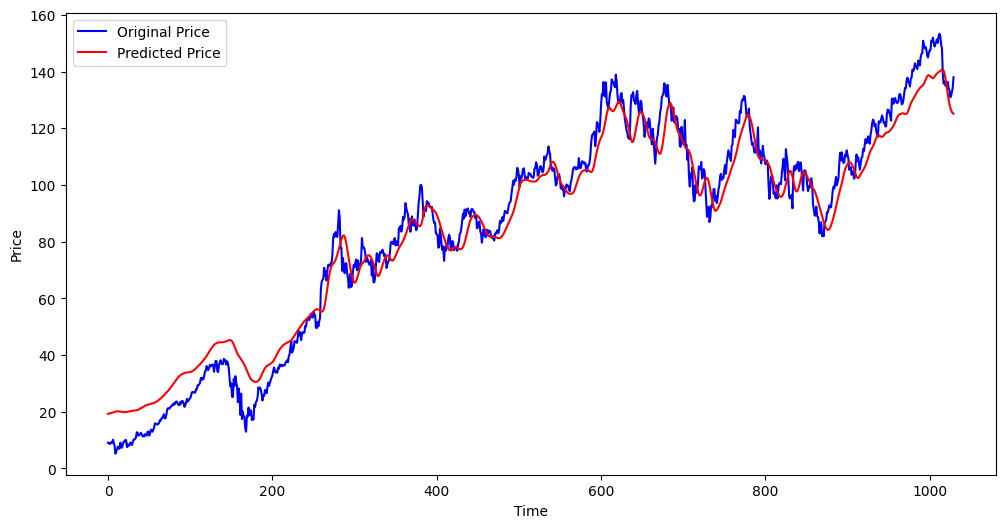

In [83]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel("Price")
plt.legend()
plt.show()
